Neste arquivo analisaremos a tabela de predição de ataques cardiacos, tentaremos encontrar padroes em seus dados para treinar inteligencias no reconhecimendo de chance dos mesmos.
No primeiro bloco, importamos todas as librarias necessarias e colocamos na variavel dados nosso datatable

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

dados = pd.read_csv('heart_attack_prediction_dataset.csv')

Descritivos informativos do datatable
deletamos a coluna  hemisferio pois a mesma não serve de nenhum proposito interessante a nossos estudos


In [2]:
dados = dados.drop(['Hemisphere'], axis=1)

In [3]:
dados.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

# --------------------------------------------------------------------------------------------------

### Primeiramente, visamos entender se as horas de sono tem algum tipo de correlação com o genero

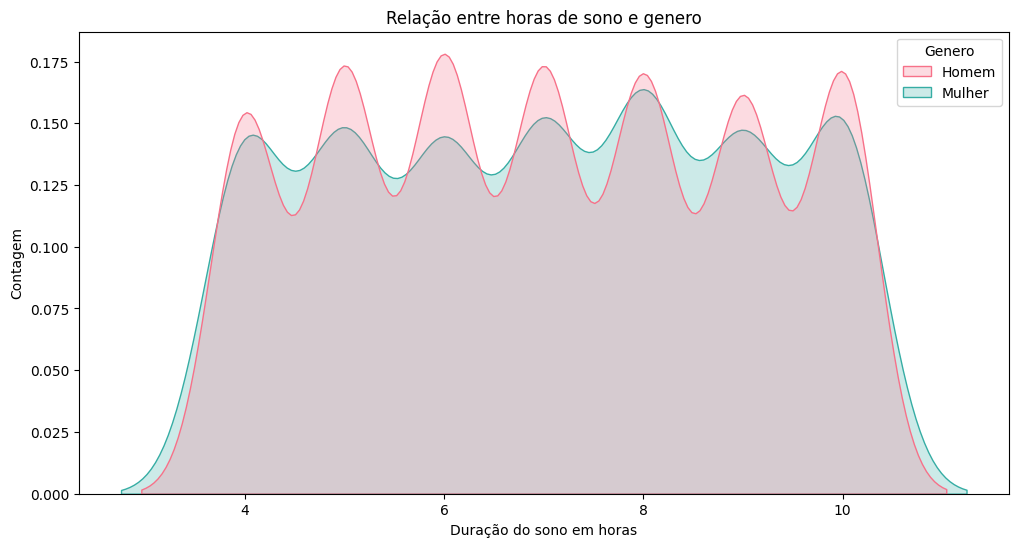

In [5]:
dados.loc[dados['Sex'] == 'Male', 'Sex'] = 'Homem'
dados.loc[dados['Sex'] == 'Female', 'Sex'] = 'Mulher'
dados = dados.rename(columns={'Sex': 'Genero'})

plt.figure(figsize=(12, 6))
sns.kdeplot(data=dados, x='Sleep Hours Per Day', hue='Genero', common_norm=False, fill=True, palette='husl')
plt.title('Relação entre horas de sono e genero')
plt.xlabel('Duração do sono em horas')
plt.ylabel('Contagem')
plt.show()

### Podemos notar que, apesar de parecer balanceado os homens possuim mais disponibilidade de horas para dormir que as mulheres

# --------------------------------------------------------------------------------------------------

### No seguinte grafico, buscamos visualizar se a disponibilidade financeira interfere em quantos dias o individuo consegue praticar atividade fisica por semana

<Axes: title={'center': 'Renda x Frequencia de atividade fisica semanalmente'}, xlabel='Dias que realizou atividades fisicas', ylabel='Renda anual'>

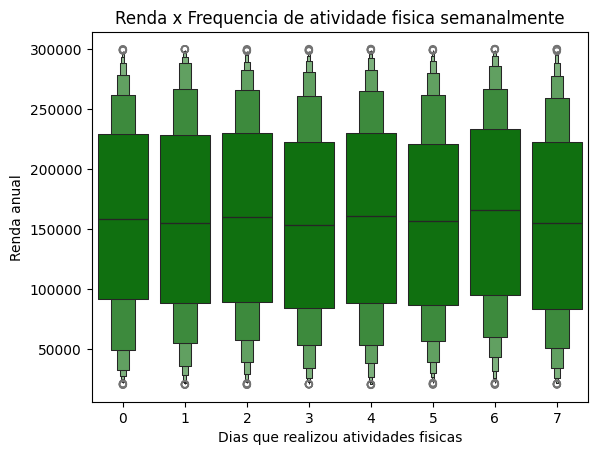

In [6]:
plt.title('Renda x Frequencia de atividade fisica semanalmente')
plt.xlabel('Dias que realizou atividades fisicas')
plt.ylabel('Renda anual')

sns.boxenplot(
    dados, x="Physical Activity Days Per Week", y="Income",
    color="g"
)

Observamos que os dias disponiveis para atividade fisica seguem a mesma distribuiçao em relação a renda, podemos entender que a disponibilidade financeira não afeta de forma relevante a disponibilidade para atividades fisicas.
É tambem visivel que, nas extremidades financeiras poucos individuos fazem exercicio.

# --------------------------------------------------------------------------------------------------

## Neste grafico de linhas buscamos observar se ao decorrer da vida, por conta da idade, vemos um decaimento na qualdiade do indice de IMC das pessoas

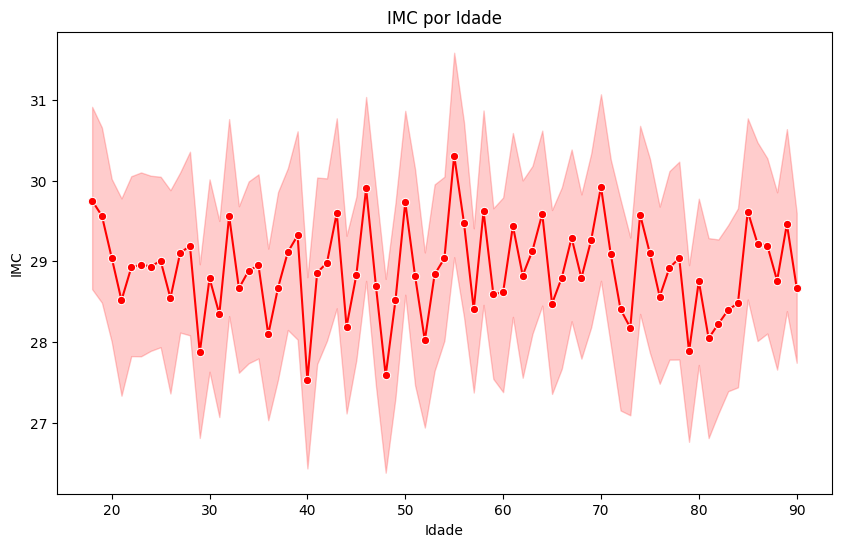

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='BMI', data=dados, marker='o', color='red')
plt.title('IMC por Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()

# --------------------------------------------------------------------------------------------------

### No histograma, visamos identificar a relação entre obesidade e continentes, para estudar os fatores culturais e geneticos que podem estar envolvidos no ganho de peso.

C:\Users\Rafael\AppData\Local\Temp\ipykernel_14044\2892030073.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Não' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados.loc[dados['Obesity'] == 0, 'Obesity'] = 'Não' # --------


<Axes: title={'center': 'Quantificação de obesidade por continente'}, xlabel='Continente', ylabel='Contagem'>

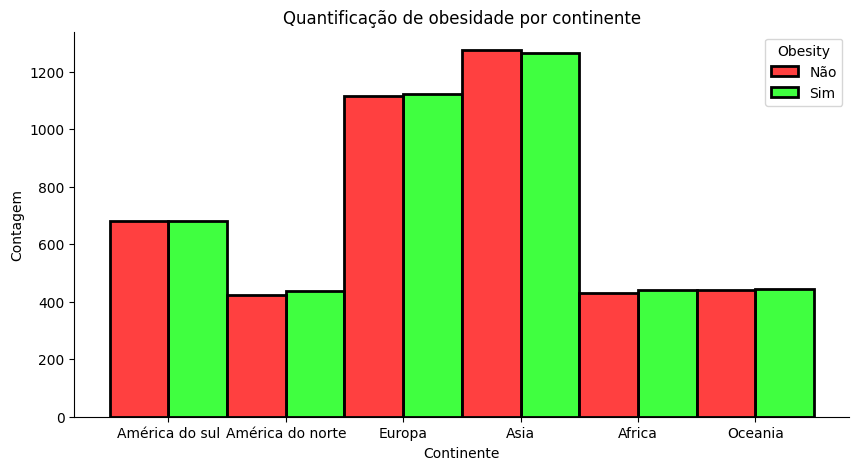

In [8]:
dados.loc[dados['Continent'] == 'South America', 'Continent'] = 'América do sul'
dados.loc[dados['Continent'] == 'North America', 'Continent'] = 'América do norte'
dados.loc[dados['Continent'] == 'Australia', 'Continent'] = 'Oceania'
dados.loc[dados['Continent'] == 'Europe', 'Continent'] = 'Europa'

dados.loc[dados['Obesity'] == 0, 'Obesity'] = 'Não' # --------
dados.loc[dados['Obesity'] == 1, 'Obesity'] = 'Sim' # Aqui renomeamos as colunas para melhor visualização

palette = ['#ff0000', '#00ff00'] 

f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

plt.title('Quantificação de obesidade por continente') # Aqui damos titulo ao grafico

plt.xlabel('Continente') # Aqui renomeamos as labels

plt.ylabel('Contagem')


sns.histplot(
    dados,
    x="Continent", hue="Obesity", 
    multiple="dodge",
    palette=palette,
    edgecolor="black",
    linewidth=2,
)

###
 Concluimos que o balanço entre presença ou ausencia de obesidade é muito similar para todos os continentes, representando indiferença na relação entre obesidade e cultura alimentar

# --------------------------------------------------------------------------------------------------

## Aqui tentamos compreender a fundo a correlação entre estresse, frequencia de batimentos cardiacos e fumantes.

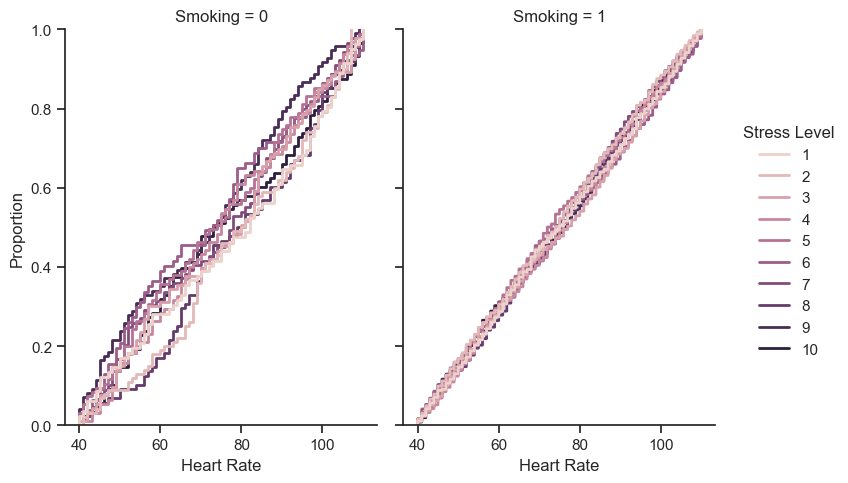

In [9]:
sns.set_theme(style="ticks")


sns.displot(
    dados,
    x="Heart Rate", col="Smoking", hue="Stress Level",
    kind="ecdf", aspect=.75, linewidth=2,
)

### Observamos que os não fumantes que tem frequencia cardiaca elevada possuem alto nivel de estresse, enquanto todos fumantes se encontram proporcionalmente distribuidos por baixo nivel de estresse.


# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Clusterização 


### 1 - Aqui dropamos as colunas irrelevantes para a análise e de dificil mapeamento
### 2 - Aqui mapeamos as colunas para valores que possibilitarão o treinamento

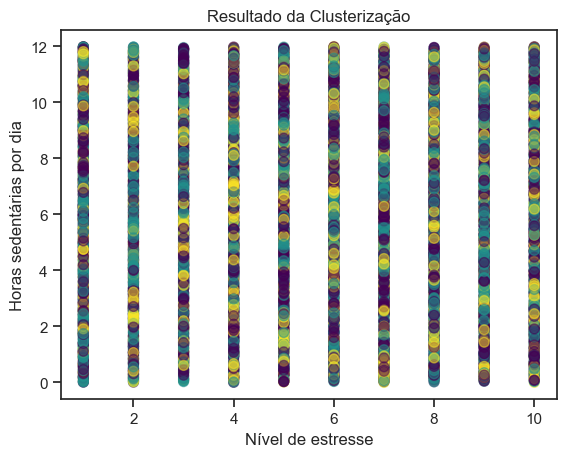

In [10]:
from sklearn.cluster import AgglomerativeClustering

dados = pd.read_csv('heart_attack_prediction_dataset.csv')
# 1 ------------------------------------------------------
X = dados.drop(['BMI','Blood Pressure', 'Patient ID', 'Country', 'Continent', 'Hemisphere'], axis= 1)
# 2 ------------------------------------------------------
X.loc[X['Sex'] == 'Male', 'Sex'] = 1
X.loc[X['Sex'] == 'Female', 'Sex'] = 0
X.loc[X['Diet'] == 'Healthy', 'Diet'] = 2
X.loc[X['Diet'] == 'Unhealthy', 'Diet'] = 0
X.loc[X['Diet'] == 'Average', 'Diet'] = 1


agglomerative = AgglomerativeClustering(n_clusters=3)
labels = agglomerative.fit_predict(X)

X = pd.DataFrame(dados)  

X_modificado = X['Stress Level']
Y_modificado = X['Sedentary Hours Per Day']


plt.scatter(X_modificado, Y_modificado, c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Resultado da Clusterização')
plt.xlabel('Nível de estresse')
plt.ylabel('Horas sedentárias por dia')
plt.show()

### a clusterização hierárquica nos permitiu identificar padrões de similaridade nos níveis de estresse e nas horas sedentárias por dia, facilitando a compreensão das relações entre essas variáveis no conjunto de dados.

# MODELOS SUPERVISIONADO (Regressão)

In [11]:
dados = pd.read_csv('heart_attack_prediction_dataset.csv')
# 1 ------------------------------------------------------
X = dados.drop(['BMI','Blood Pressure', 'Patient ID', 'Country', 'Continent', 'Hemisphere'], axis= 1)
# 2 ------------------------------------------------------
X.loc[X['Sex'] == 'Male', 'Sex'] = 1
X.loc[X['Sex'] == 'Female', 'Sex'] = 0
X.loc[X['Diet'] == 'Healthy', 'Diet'] = 2
X.loc[X['Diet'] == 'Unhealthy', 'Diet'] = 0
X.loc[X['Diet'] == 'Average', 'Diet'] = 1

Y = dados['Smoking']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size= 0.3, random_state=50)

In [13]:
modelo_regressao = LinearRegression()

In [14]:
modelo_regressao.fit(x_train, y_train)

LinearRegression()

In [15]:
previsoes_regressao = modelo_regressao.predict(x_test)

In [16]:
mse = mean_squared_error(y_test, previsoes_regressao)
r2 = r2_score(y_test, previsoes_regressao)

In [17]:
print("Métricas do Modelo de Regressão:")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2}")

Métricas do Modelo de Regressão:
Erro Quadrático Médio (MSE): 3.77457888097442e-28
Coeficiente de Determinação (R^2): 1.0


# ----------------------------------------------------------------------


# MODELOS SUPERVISIONADOS (Classificação)

#Treino
**Aqui separamos nossos dados entre treino e teste, sendo 70% dedicados a treino e 30% a testes, repetimos essa separação e treinamentos por 100 vezes e em seguida tiramos a media dos resultados de suas acuracias, garantindo assim que nossos resultados não sejam influenciados por randomicidade**


In [18]:
# Função de média da lista
def media(lst):
    return sum(lst) / len(lst)

scoresKnn = []

scoresNaiveGaussian = []
scoresNaiveMultinomial = []
scoresNaiveBernoulli = []

scoresSvm = []

scoresNeural = []

with warnings.catch_warnings(): #ignora avisos e prints gerados pela neural
  warnings.simplefilter("ignore", category=ConvergenceWarning)
  maximumIter=1000000000

  #split da tabela entre train test
  #realizamos o split, treinamento e score 100 vezes e tiramos a media, para que
  #o resultado seja mais preciso

  for c in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

    #knn
    knn = KNeighborsClassifier(7).fit(x_train, y_train)
    scoresKnn.append(knn.score(x_test, y_test))

    #naive
    nbG = GaussianNB()
    nbG.fit(x_train, y_train)
    nbG.score(x_train, y_train)
    scoresNaiveGaussian.append(nbG.score(x_train, y_train))

    nbM = MultinomialNB()
    nbM.fit(x_train, y_train)
    nbM.score(x_train, y_train)
    scoresNaiveMultinomial.append(nbM.score(x_train, y_train))

    nbB = BernoulliNB()
    nbB.fit(x_train, y_train)
    nbB.score(x_train, y_train)
    scoresNaiveBernoulli.append(nbB.score(x_train, y_train))

    #svm
    svm = SVC(C = 3).fit(x_train, y_train)
    scoresSvm.append(svm.score(x_train, y_train))

    #neural
    neural = MLPClassifier(solver='lbfgs',max_iter=maximumIter, alpha=1e-5, hidden_layer_sizes=(15, 15))
    neural.fit(x_train, y_train)
    scoresNeural.append(neural.score(x_train, y_train))


mediasAcuracia = {
    'KNN':media(scoresKnn),'SVM':media(scoresSvm),'NGaussian':media(scoresNaiveGaussian),
    'NMultinomial':media(scoresNaiveMultinomial),'NBernoulli':media(scoresNaiveBernoulli),
    'Neural':media(scoresNeural)}

#Resultados
**Podemos observar os algoritimos que obtem maior sucesso quando utilizados em nossa base com base em seus respectivos scores, estes mesmos algoritimos serao utilizados para nosso comite de decisoes**

In [19]:
scoresSorted = sorted(mediasAcuracia,key=mediasAcuracia.get ,reverse=True)[:6]

print('Os tres melhores metodos foram:',scoresSorted[0],scoresSorted[1],scoresSorted[2], sep='|')
print('\n\nCom respectivas acuracias de:',
      mediasAcuracia[scoresSorted[0]],
      mediasAcuracia[scoresSorted[1]],
      mediasAcuracia[scoresSorted[2]],sep='|')

print('\n\nAcuracia KNN:',media(scoresKnn),
      '\nAcuracia SVM:',media(scoresSvm),
      '\nAcuracia NGaussian:',media(scoresNaiveGaussian),
      '\nAcuracia NMultinomial:', media(scoresNaiveMultinomial),
      '\nAcuracia NBernoulli:', media(scoresNaiveBernoulli),
      '\nAcuracia Neural:',media(scoresNeural))

Os tres melhores metodos foram:|NBernoulli|NGaussian|SVM


Com respectivas acuracias de:|1.0|0.9170939917597885|0.8969529003764415


Acuracia KNN: 0.8938798406276529 
Acuracia SVM: 0.8969529003764415 
Acuracia NGaussian: 0.9170939917597885 
Acuracia NMultinomial: 0.8106134708677917 
Acuracia NBernoulli: 1.0 
Acuracia Neural: 0.7119268985913917


**Para explorar mais estes scores de acuracia, aplicaremos matrizes de confusao a todos nossos algoritimos, exibindo assim como fica a distribuição de seus resultados.**

In [20]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
def matrizConfusao(classifier,name):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    fig = px.imshow(cm,labels=dict(x="Predição da IA", y="Resultado Esperado"),text_auto=True,color_continuous_scale='Agsunset',title=name)
    fig.show()

algoNames = ['Knn', 'Naive Gaussian', 'Naive Multinomial', 'Naive Bernoulli', 'SVM', 'Neural']
algoritimos = [knn, nbG, nbM, nbB, svm, neural]

for i in range(len(algoritimos)):
  matrizConfusao(algoritimos[i],algoNames[i])